# <u>Ecommerce Dataset Analysis<u/>

## Table of Contents

* [Problem Statement](#section1)<br>
* [Details](#section2)
* [Importing packages](#section3)
    - * [Understanding the Dataset](#section4)<br/>
    - * [Preprocessing](#section5)<br/>
* [Data Visualisation and Questions answered](#section6)<br/>
 - * [Q.1 Which Major Category of Ecommerce are more in demand?](#section7)<br/>
    - * [Q.2 Which Minor Category of Ecommerce are more in demand?](#section8)<br/>
    - * [Q.3 Which Country of Ecommerce are more in demand?](#section9)<br/>
    - * [Q.4 In which range OrderValue lies, what is distribution look like?](#section10)<br/>
    - * [Q.5 In which range Quantit lies, what is distribution look like?](#section11)<br/>
    - * [Q.6 What is the best order value in major category?](#section12)<br/>
    - * [Q.7 What is the best Quantit in major category?](#section13)<br/>
    - * [Q.8 Which year of Ecommerce are more in demand?](#section14)<br/>
    - * [Q.9 How order value is distributed over the months for each year?](#section15)<br/>
    - * [Q.10 What is the best order value in Country?](#section16)<br/>
    - * [Q.11 What is the best Quantit in Country?](#section17)<br/>
    - * [ Q.12 What's the Time of the day that contributes to high Quantit?](#section18)<br/>
   - * [Q.13 How dataset features are correlated with each other?](#section19)<br/>
* [Convert to csv file](#section20)<br/> 
* [Conclusions](#section21)<br/>  

<a id=section1></a>

###  Problem Statement

- The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __(EDA)__ for analysis purpose.

<ul>The variables of the dataset are the following:</ul>

* Categorical: ‘Country’,’Major Category’,’Minor Category’
* Date: ‘InvoiceDate’,’Year-Month’
* Numerical:’InvoiceNo’, ‘UnitPrice’, ‘OrderValue’, ‘Quantit’

<a id=section2></a>

## Details:
- The dataset comprises of __700 observations of 11 columns__. Below is a table showing names of all the columns and their description.


<a id=section3></a>

###  Importing packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

- Read in the Ecommerce Prices csv file as a DataFrame called df

In [2]:
df = pd.read_csv('ecommerce.csv')
df

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART
...,...,...,...,...,...,...,...,...,...,...,...
695,564087,1.25,20.00,16,Hong Kong,23/8/11,09:38,2011-08,Clothes,Tops,WOOD STAMP SET THANK YOU
696,553148,0.55,13.20,24,Hong Kong,13/5/11,14:09,2011-05,Garden,Hoses,GREEN POLKADOT BOWL
697,564087,4.95,29.70,6,Hong Kong,23/8/11,09:38,2011-08,Garden,Rakes,TOY TIDY SPACEBOY
698,553148,0.85,27.20,32,Hong Kong,13/5/11,14:09,2011-05,Kitchen,Cooking Knives,RED RETROSPOT CHILDRENS UMBRELLA


<a id=section4></a>

### Understanding The Ecommerce Dataset

- Lets check our data shape:
- __Dataset__  has __700 rows__ and __11 columns.__

In [3]:
df.shape

(700, 11)

In [4]:
df.columns    #This will print the names of all columns.

Index(['InvoiceNo  ', 'UnitPrice', 'OrderValue', 'Quantit', 'Country',
       ' InvoiceDate', 'InvoiceTime', 'Year-Month', 'Major Category',
       'Minor Category', 'Description'],
      dtype='object')

In [5]:
df.head()  # Will give you first 5 records

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART


In [6]:
df.tail()  # This will print the last n rows of the Data Frame

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description
695,564087,1.25,20.0,16,Hong Kong,23/8/11,09:38,2011-08,Clothes,Tops,WOOD STAMP SET THANK YOU
696,553148,0.55,13.2,24,Hong Kong,13/5/11,14:09,2011-05,Garden,Hoses,GREEN POLKADOT BOWL
697,564087,4.95,29.7,6,Hong Kong,23/8/11,09:38,2011-08,Garden,Rakes,TOY TIDY SPACEBOY
698,553148,0.85,27.2,32,Hong Kong,13/5/11,14:09,2011-05,Kitchen,Cooking Knives,RED RETROSPOT CHILDRENS UMBRELLA
699,564087,1.25,20.0,16,Hong Kong,23/8/11,09:38,2011-08,Clothes,Tops,PACK OF 60 SPACEBOY CAK


In [7]:
#gain insights of your data set and see general information about each feature and the total number of non-null values in each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceNo       700 non-null    int64  
 1   UnitPrice       700 non-null    float64
 2   OrderValue      700 non-null    float64
 3   Quantit         700 non-null    int64  
 4   Country         700 non-null    object 
 5    InvoiceDate    700 non-null    object 
 6   InvoiceTime     700 non-null    object 
 7   Year-Month      700 non-null    object 
 8   Major Category  700 non-null    object 
 9   Minor Category  700 non-null    object 
 10  Description     700 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 60.3+ KB


Well as a first observation we can see that we are lucky, we dont have any missing values 
(700 complete data) and 11 columns. Now let's do the InvoiceDate Feature in pre-processing later so we can be able to use the day , month and year columns.

In [8]:
#You can get idea that gives summary statstics for only intersting numerical features in your data set.
df.describe()

,InvoiceNo,UnitPrice,OrderValue,Quantit
count,700.000000,700.000000,700.000000,700.000000
mean,559180.801429,3.367086,31.978471,20.865714
std,13246.185339,8.280695,63.658083,63.867322
min,536370.000000,0.120000,0.290000,1.000000
25%,547501.000000,1.250000,8.290000,3.000000
50%,559327.500000,1.950000,15.600000,8.000000
75%,570672.000000,3.750000,25.272500,16.000000
max,581587.000000,202.420000,633.600000,1152.000000


- We can see all columns having count __700__. Looks like it doesn't contain missing values

In [9]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

InvoiceNo         0
UnitPrice         0
OrderValue        0
Quantit           0
Country           0
 InvoiceDate      0
InvoiceTime       0
Year-Month        0
Major Category    0
Minor Category    0
Description       0
dtype: int64

- We can see that __no missing values__ exist in dataset, that's great!

<a id=section5></a>

###  Preprocessing

- Let's take a copy of the data

In [10]:
df_clean = df.copy()


- The Feature __"Description"__ un needed coulmn , let's remove them now!

In [11]:
df_clean.drop(['Description'] ,axis=1 , inplace=True)

- Lets check our data head again to make sure that the Feature __"Description"__

In [12]:
df_clean.head()

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses


- Earlier in __info__ we have seen that __InvoiceDate__ is __Object__ type not the date type. We have to change its type to __date__ type.
-  __InvoiceDate__ contains a space, so we rename the coulmn 

In [13]:
df_clean[' InvoiceDate']= pd.to_datetime(df_clean[' InvoiceDate'])

- Lets check our data types again to make sure that the Feature  __InvoiceDate__ is a datetime

In [14]:
df_clean.dtypes

InvoiceNo                  int64
UnitPrice                float64
OrderValue               float64
Quantit                    int64
Country                   object
 InvoiceDate      datetime64[ns]
InvoiceTime               object
Year-Month                object
Major Category            object
Minor Category            object
dtype: object

- lets rename the coulmn  __InvoiceDate__

In [15]:
df_clean.rename(columns={' InvoiceDate' : 'InvoiceDate'} ,inplace = True)

- Lets check our data head again to make sure that the Feature  __InvoiceDate__ is __renamed to__   __InvoiceDate__

In [16]:
df_clean['InvoiceDate'].head()

0   2011-07-04
1   2011-11-15
2   2011-04-27
3   2011-10-31
4   2010-12-17
Name: InvoiceDate, dtype: datetime64[ns]

- Now let's create the day , month and year columns so we can use them

In [17]:
df_clean['day'] = df_clean['InvoiceDate'].dt.day
df_clean['month'] = df_clean['InvoiceDate'].dt.month
df_clean['year'] = df_clean['InvoiceDate'].dt.year

In [18]:
df_clean.head()

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,day,month,year
0,549185,0.85,10.20,12,United Kingdom,2011-07-04,09:35,2011-04,Clothes,Tops,4,7,2011
1,576381,2.95,35.40,12,United Kingdom,2011-11-15,09:26,2011-11,Clothes,Shoes,15,11,2011
2,551192,1.25,20.00,16,United Kingdom,2011-04-27,10:54,2011-04,Kitchen,Cutlery,27,4,2011
3,573553,7.46,7.46,1,United Kingdom,2011-10-31,13:48,2011-10,Garden,Turf,31,10,2011
4,539436,2.51,2.51,1,United Kingdom,2010-12-17,14:49,2010-12,Garden,Hoses,17,12,2010


- now The Feature __"Year-Month"__ un needed coulmn , let's remove them now!

In [19]:
df_clean.drop(['Year-Month'] ,axis=1 , inplace=True)

In [20]:
df_clean.head()

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Major Category,Minor Category,day,month,year
0,549185,0.85,10.20,12,United Kingdom,2011-07-04,09:35,Clothes,Tops,4,7,2011
1,576381,2.95,35.40,12,United Kingdom,2011-11-15,09:26,Clothes,Shoes,15,11,2011
2,551192,1.25,20.00,16,United Kingdom,2011-04-27,10:54,Kitchen,Cutlery,27,4,2011
3,573553,7.46,7.46,1,United Kingdom,2011-10-31,13:48,Garden,Turf,31,10,2011
4,539436,2.51,2.51,1,United Kingdom,2010-12-17,14:49,Garden,Hoses,17,12,2010


- The Feature __InvoiceTime__ split to __hour__

In [21]:
df_clean['Hour'] = df_clean['InvoiceTime'].str.split(':').str[0]

In [22]:
df_clean.head()

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Major Category,Minor Category,day,month,year,Hour
0,549185,0.85,10.20,12,United Kingdom,2011-07-04,09:35,Clothes,Tops,4,7,2011,09
1,576381,2.95,35.40,12,United Kingdom,2011-11-15,09:26,Clothes,Shoes,15,11,2011,09
2,551192,1.25,20.00,16,United Kingdom,2011-04-27,10:54,Kitchen,Cutlery,27,4,2011,10
3,573553,7.46,7.46,1,United Kingdom,2011-10-31,13:48,Garden,Turf,31,10,2011,13
4,539436,2.51,2.51,1,United Kingdom,2010-12-17,14:49,Garden,Hoses,17,12,2010,14


- now The Feature __"InvoiceTime"__ un needed coulmn , let's remove them now!

In [23]:
df_clean.drop('InvoiceTime' , axis= 1 , inplace= True)

In [24]:
df_clean.head()

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,Major Category,Minor Category,day,month,year,Hour
0,549185,0.85,10.20,12,United Kingdom,2011-07-04,Clothes,Tops,4,7,2011,09
1,576381,2.95,35.40,12,United Kingdom,2011-11-15,Clothes,Shoes,15,11,2011,09
2,551192,1.25,20.00,16,United Kingdom,2011-04-27,Kitchen,Cutlery,27,4,2011,10
3,573553,7.46,7.46,1,United Kingdom,2011-10-31,Garden,Turf,31,10,2011,13
4,539436,2.51,2.51,1,United Kingdom,2010-12-17,Garden,Hoses,17,12,2010,14


<a id=section6></a>

### Data Visualisation and Questions answered

In [25]:
def clean_dataset(df):
  df1 = df[df['UnitPrice'] <= 50 ]
  df2 = df1[df1['Quantit'] <= 30]
  return df2
df_clean = clean_dataset(df_clean)

<a id=section7></a>

- __Q.1 Which Major Category of Ecommerce are more in demand?__

<AxesSubplot:xlabel='Major Category', ylabel='count'>

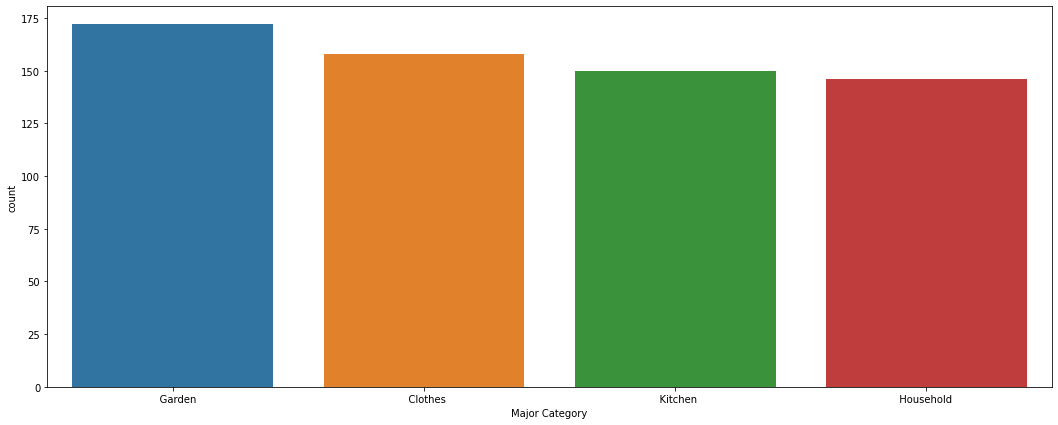

In [26]:
fig, ax = plt.subplots(figsize=(18,7))
sns.countplot(data= df_clean , x = 'Major Category' ,
              order= df_clean['Major Category'].value_counts().index )


In [38]:
fig = px.bar(data_frame= df_clean , x = df_clean['Major Category'].value_counts().index ,
             y = df_clean['Major Category'].value_counts().values ,
            text_auto='0.2s',
            labels= {'x':'Major Category', 'y': 'count'})
fig.update_layout(title_text='The best Major Category in Ecommerce Dataset', title_x=0.5)
fig.update_traces(textfont_size = 12 , textposition = 'outside')
fig.show()

- We note that __Garden Category is in more demand__ 

- Lets check the Feature __Major Category__ with pandas

In [28]:
d= df_clean['Major Category'].value_counts().reset_index()
d

,index,Major Category
0,Garden,172
1,Clothes,158
2,Kitchen,150
3,Household,146


<a id=section8></a>

- __Q.2 Which  Minor Category of Ecommerce are more in demand?__

<AxesSubplot:xlabel='Minor Category', ylabel='count'>

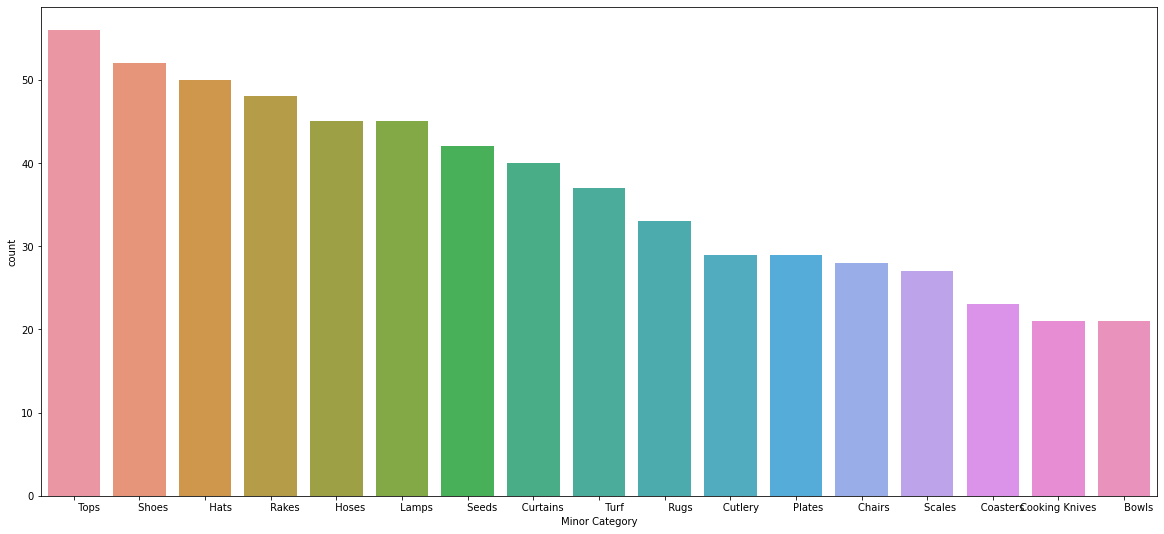

In [29]:
fig, ax = plt.subplots(figsize=(20,9))
sns.countplot(data= df_clean , x = 'Minor Category' ,
              order= df_clean['Minor Category'].value_counts().index)


In [30]:
fig = px.bar(data_frame= df_clean['Minor Category'].value_counts() , x = 'Minor Category',
            text_auto='0.2s')
fig.update_layout(title_text='The best Minor Category in Ecommerce Dataset', title_x=0.2)
fig.update_traces(textfont_size = 12 , textposition = 'outside')
fig.show()

- Although the __Garden category__ is in high demand, the most popular Minor category is the __tops__ that belong to the clothing category

- Lets check the Feature __Minor Category__ with pandas

In [31]:
df_clean['Minor Category'].value_counts().reset_index()

,index,Minor Category
0,Tops,56
1,Shoes,52
2,Hats,50
3,Rakes,48
4,Hoses,45
5,Lamps,45
6,Seeds,42
7,Curtains,40
8,Turf,37
9,Rugs,33


<a id=section9></a>

- __Q.3 Which  Country of Ecommerce are more in demand?__

<AxesSubplot:xlabel='Country', ylabel='count'>

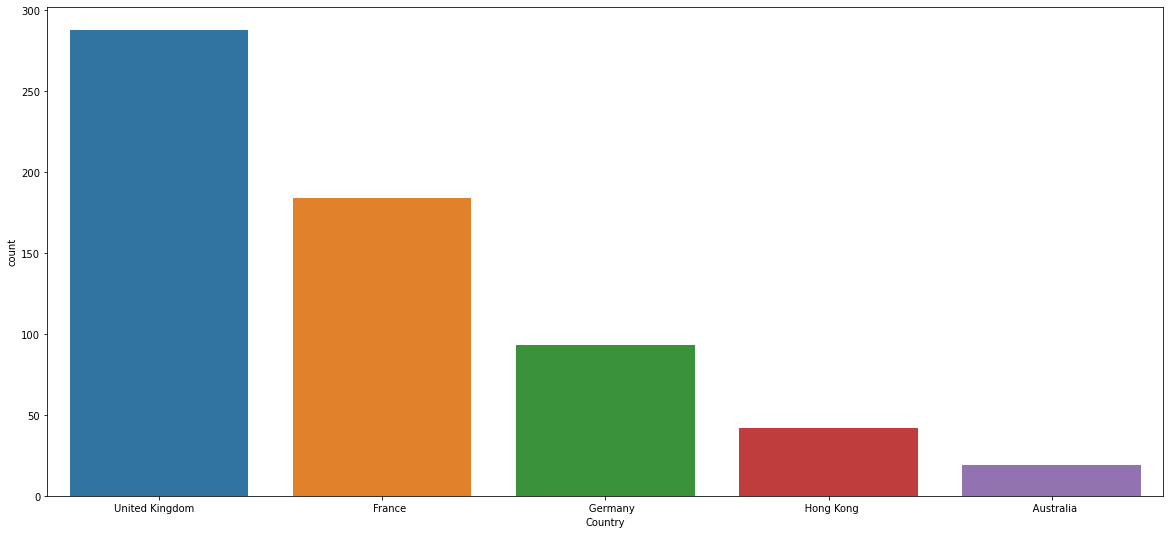

In [32]:
fig, ax = plt.subplots(figsize=(20,9))
sns.countplot(data= df_clean , x = 'Country' ,
              order= df_clean['Country'].value_counts().index)

In [33]:
fig  = px.bar(data_frame= df_clean['Country'].value_counts(), x = 'Country',
             text_auto='0.2s')
fig.update_layout(title_text='The best Country in Ecommerce Dataset', title_x=0.2)
fig.update_traces(textfont_size = 12 , textposition = 'outside')
fig.show()


- We note that __United kingdom__ is in more demand

<a id=section10></a>

- __Q.4 In which range OrderValue lies, what is distribution look like?__

<AxesSubplot:xlabel='OrderValue', ylabel='Count'>

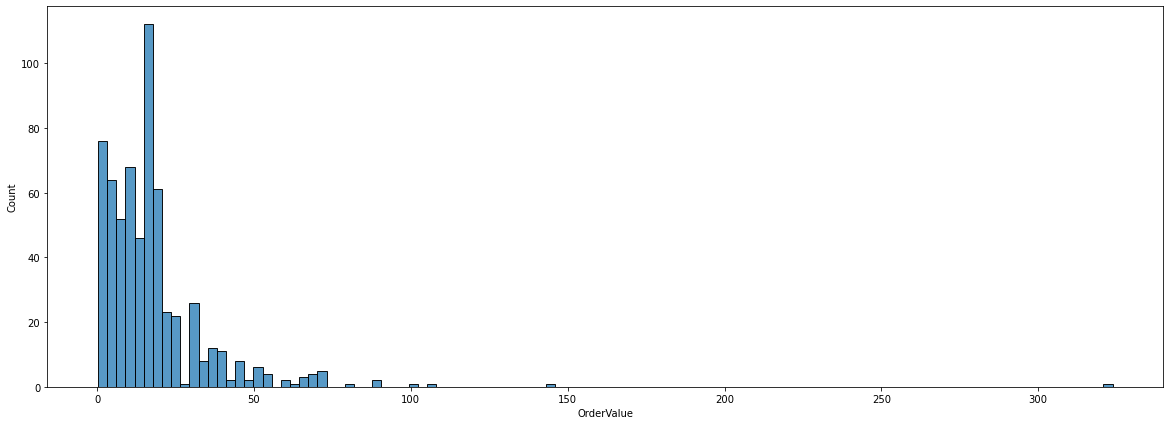

In [34]:
fig, ax = plt.subplots(figsize=(20,7))
sns.histplot(data= df_clean ,x = 'OrderValue')

In [35]:
fig = px.histogram(data_frame= df_clean,x = 'OrderValue'
                 ,text_auto='0.2s')
fig.update_layout(title_text='OrderValue distribution in Ecommerce Dataset', title_x=0.2)
fig.update_traces(textfont_size = 12 , textposition = 'outside')
fig.show()


- OrderValue distribution shows that for most cases __between 15, 20.__

<a id=section11></a>

- __Q.5 In which range Quantit lies, what is distribution look like?__

(array([197., 125.,  43., 156.,   2.,  14.,  12.,  60.,  13.,   4.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

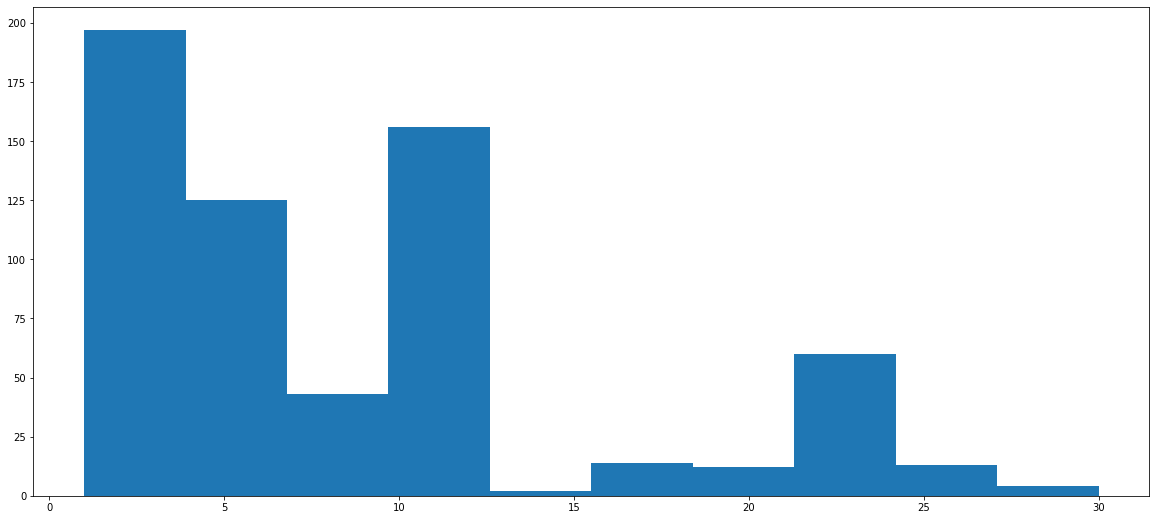

In [36]:
fig, ax = plt.subplots(figsize=(20,9))
plt.hist(data = df_clean ,x = 'Quantit')

In [39]:
fig = px.histogram(data_frame = df_clean ,x = 'Quantit'
            ,text_auto='0.2s')
fig.update_traces(textfont_size = 12 , textposition = 'outside')
fig.show()

- Quantit distribution shows that for most cases __between 1, 13.__

<a id=section12></a>

- __Q.6 What is the best order value in major category?__

<AxesSubplot:xlabel='Major Category', ylabel='OrderValue'>

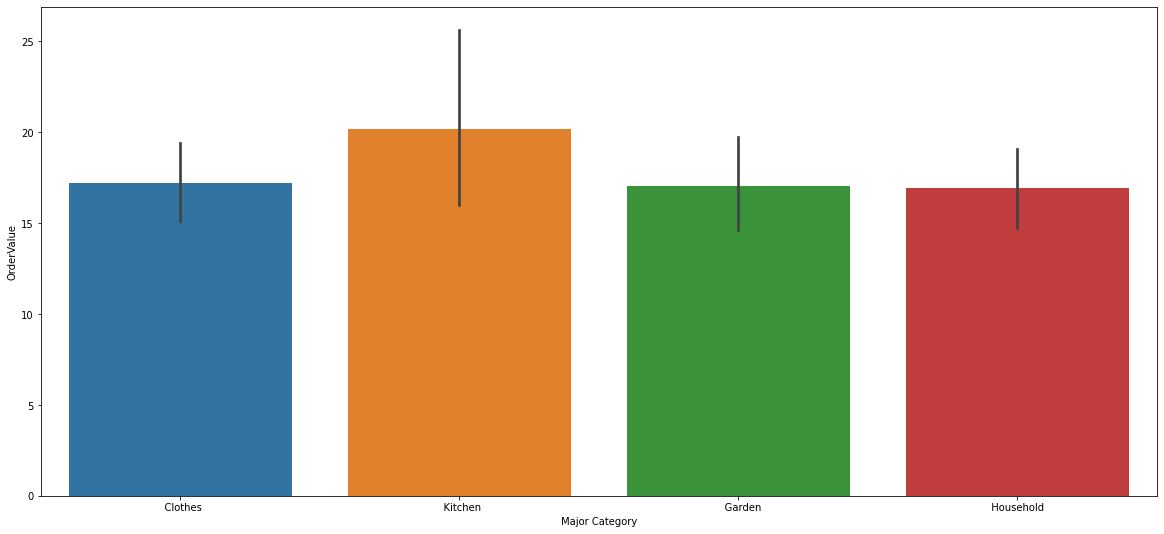

In [40]:
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(data=df_clean ,x = 'Major Category', y = 'OrderValue')

In [41]:
fig = px.pie(data_frame=df_clean , names =df_clean.groupby('Major Category')['OrderValue'].sum().index
       , values = df_clean.groupby('Major Category')['OrderValue'].sum().values ,
      hole=0.3)
fig.update_layout(title_text='The Best Order value in Major Category ', title_x=0.2)
fig.show()

- lets check with pandas 

In [42]:
df_clean.groupby('Major Category')['OrderValue'].sum().reset_index()

,Major Category,OrderValue
0,Garden,2931.36
1,Clothes,2720.51
2,Kitchen,3027.52
3,Household,2467.42


-  best order value in major category is __Kitchen__

<a id=section13></a>

 __Q.7 What is the best Quantit in major category?__

<AxesSubplot:xlabel='Major Category', ylabel='Quantit'>

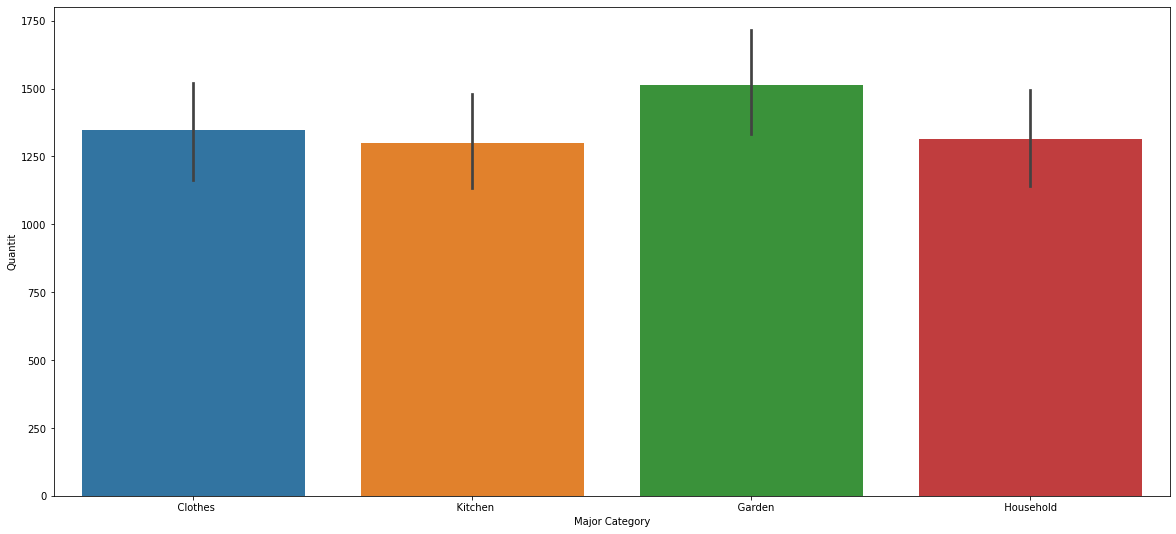

In [43]:
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(data= df_clean , x= 'Major Category', y='Quantit' ,estimator=np.sum)

In [44]:
fig = px.pie(data_frame=df_clean , names =df_clean.groupby('Major Category')['Quantit'].sum().index
       , values = df_clean.groupby('Major Category')['Quantit'].sum().values ,
      hole=0.3)
fig.update_layout(title_text='The Best Order value in Major Category ', title_x=0.2)
fig.show()


In [45]:
df_clean.groupby('Major Category')['Quantit'].count().reset_index()

,Major Category,Quantit
0,Garden,172
1,Clothes,158
2,Kitchen,150
3,Household,146


- the best Quantit in major category __Garden__

<a id=section14></a>

- __Q.8 Which  year of Ecommerce are more in demand?__

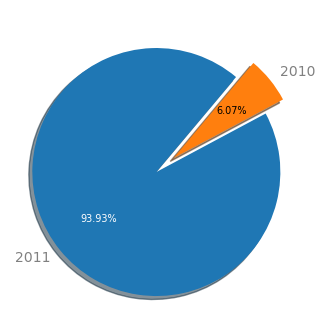

In [46]:
values = df_clean.year.value_counts()
labels = values.index
fig, ax = plt.subplots(figsize = (4, 6), dpi = 100)
explode = (0.09, 0.09)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 50, explode = explode)
plt.setp(texts, color = 'gray')
plt.setp(autotexts, size = 7, color = 'white')
autotexts[1].set_color('black')
plt.show()

In [47]:
df_clean.head()

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,Major Category,Minor Category,day,month,year,Hour
0,549185,0.85,10.20,12,United Kingdom,2011-07-04,Clothes,Tops,4,7,2011,09
1,576381,2.95,35.40,12,United Kingdom,2011-11-15,Clothes,Shoes,15,11,2011,09
2,551192,1.25,20.00,16,United Kingdom,2011-04-27,Kitchen,Cutlery,27,4,2011,10
3,573553,7.46,7.46,1,United Kingdom,2011-10-31,Garden,Turf,31,10,2011,13
4,539436,2.51,2.51,1,United Kingdom,2010-12-17,Garden,Hoses,17,12,2010,14


In [48]:
fig = px.pie(data_frame=df_clean , names =df_clean.groupby('year')['OrderValue'].count().index
       , values = df_clean.groupby('year')['OrderValue'].count().values)
fig.update_layout(title_text='The Best Year in Ecommerce Dataset ', title_x=0.2)
fig.show()

<a id=section15></a>

- __Q.9 How order value is distributed over the months for each year?__

<AxesSubplot:xlabel='month', ylabel='OrderValue'>

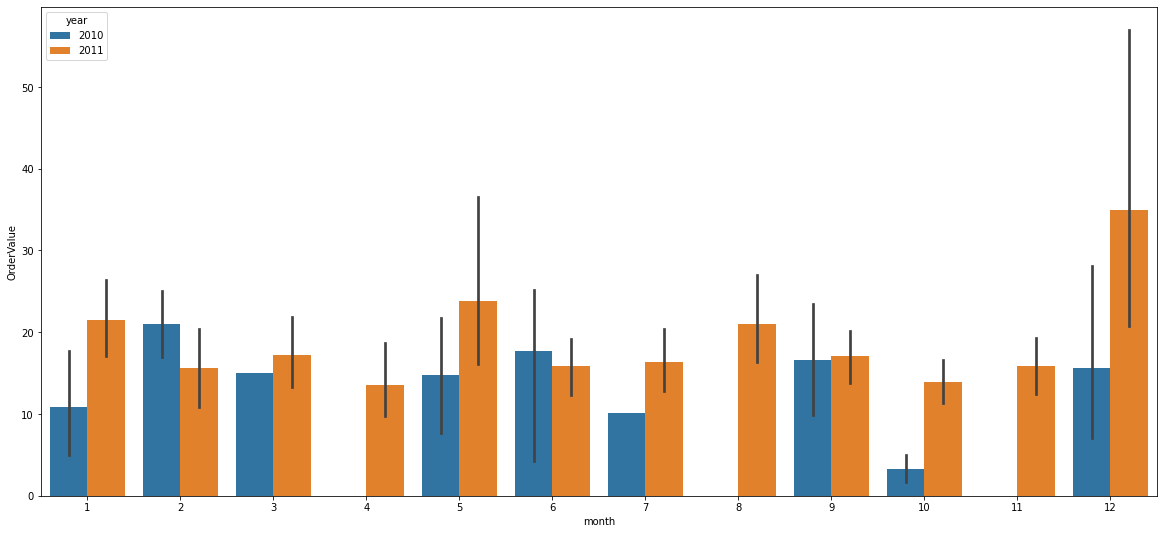

In [49]:
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(data = df_clean ,x = 'month', y = 'OrderValue' , estimator= np.mean ,hue= 'year')

In [50]:
aa = df_clean.groupby(['month', 'year']).mean()['OrderValue'].reset_index()
aa

,month,year,OrderValue
0,1,2010,10.910000
1,1,2011,21.465600
2,2,2010,21.000000
3,2,2011,15.604000
4,3,2010,15.000000
5,3,2011,17.159070
6,4,2011,13.558485
7,5,2010,14.760000
8,5,2011,23.759649
9,6,2010,17.656667


In [51]:
fig  = px.bar(data_frame=aa , x = 'month', y = 'OrderValue' ,
       color='year' , text_auto='0.2s')
fig.update_traces(textfont_size = 12 , textposition = 'outside')
fig.update_layout(title_text='order value is distributed over the months for each year ', title_x=0.2)
fig.show()

- We notice how close the values are in months __6 and 9__

- __Q.9 How Quantit is distributed over the months for each year?__

<AxesSubplot:xlabel='month', ylabel='Quantit'>

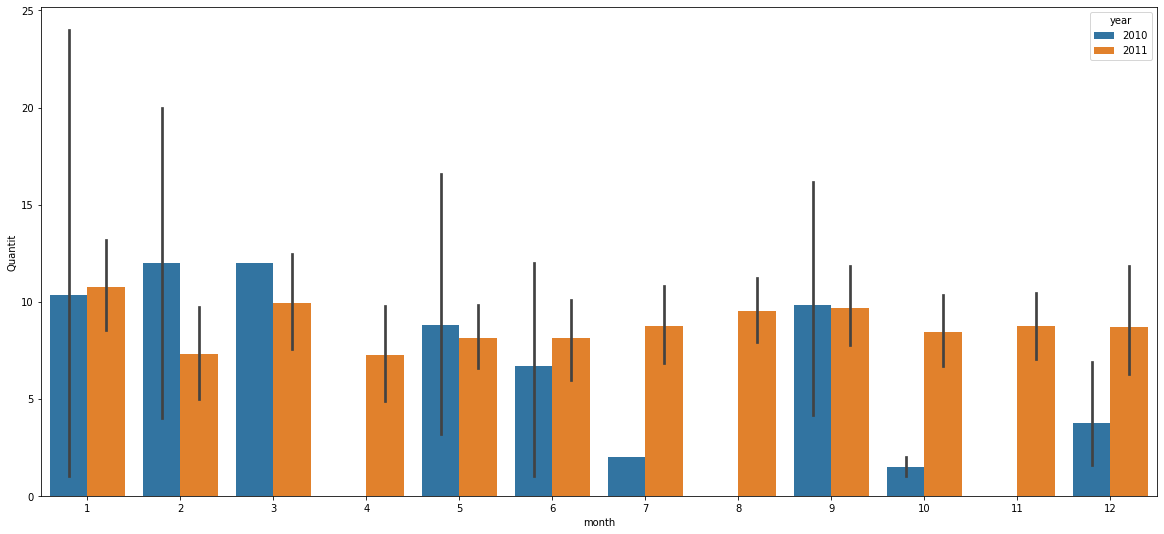

In [52]:
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(data = df_clean ,x = 'month', y = 'Quantit' , estimator= np.mean ,hue= 'year')

In [53]:
bb = df_clean.groupby(['month', 'year']).mean()['Quantit'].reset_index()
bb

,month,year,Quantit
0,1,2010,10.333333
1,1,2011,10.780000
2,2,2010,12.000000
3,2,2011,7.300000
4,3,2010,12.000000
5,3,2011,9.906977
6,4,2011,7.242424
7,5,2010,8.800000
8,5,2011,8.122807
9,6,2010,6.666667


In [54]:
fig = px.bar(data_frame=bb , x = 'month', y = 'Quantit' ,
              color='year' , text_auto='0.2s')
fig.update_traces(textfont_size = 12 , textposition = 'outside')
fig.update_layout(title_text='Quantit is distributed over the months for each year ', title_x=0.2)
fig.show()

In [55]:
fig = px.sunburst(data_frame=bb , names= 'year' , path=['year', 'month'] , values= 'Quantit')
fig.update_layout(title_text='Quantit is distributed over the months for each year ', title_x=0.2)
fig.show()

E:\anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

E:\anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



- We notice how close the values are in month __9__

<a id=section16></a>

- __Q.10 What is the best order value in Country?__

<AxesSubplot:xlabel='Country', ylabel='OrderValue'>

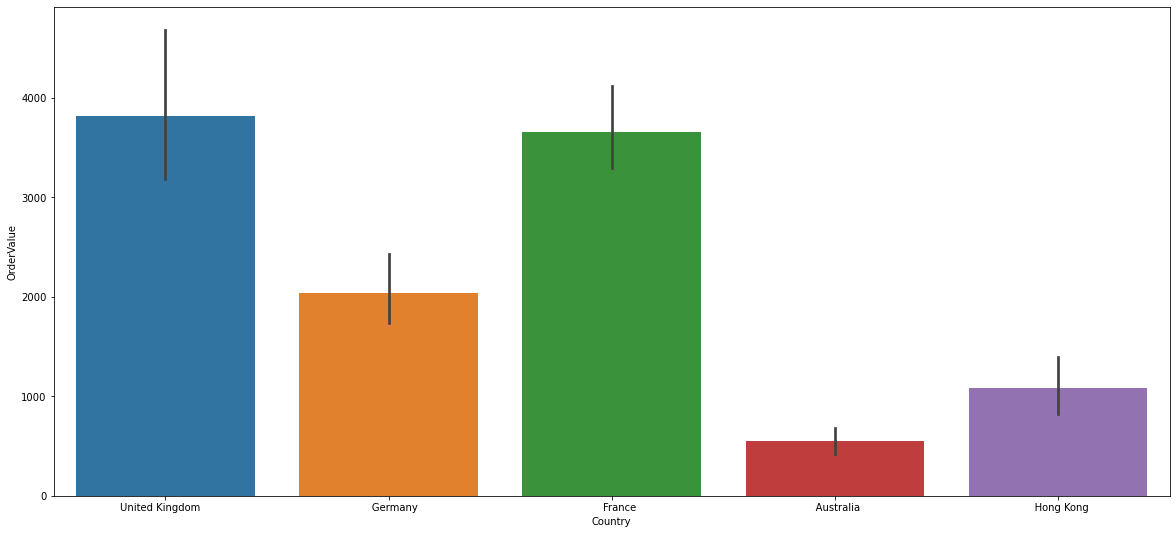

In [56]:
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(data = df_clean , x = 'Country', y = 'OrderValue' ,estimator=np.sum)

In [57]:
fig = px.bar(data_frame= df_clean , x = 'Country' , y = 'OrderValue')
fig.update_layout(title_text='The Best Order Value In Country', title_x=0.2)
fig.show()


- the best order value in Country __United Kingdom__

<a id=section17></a>

- __Q.11 What is the best Quantit in Country?__

<AxesSubplot:xlabel='Country', ylabel='Quantit'>

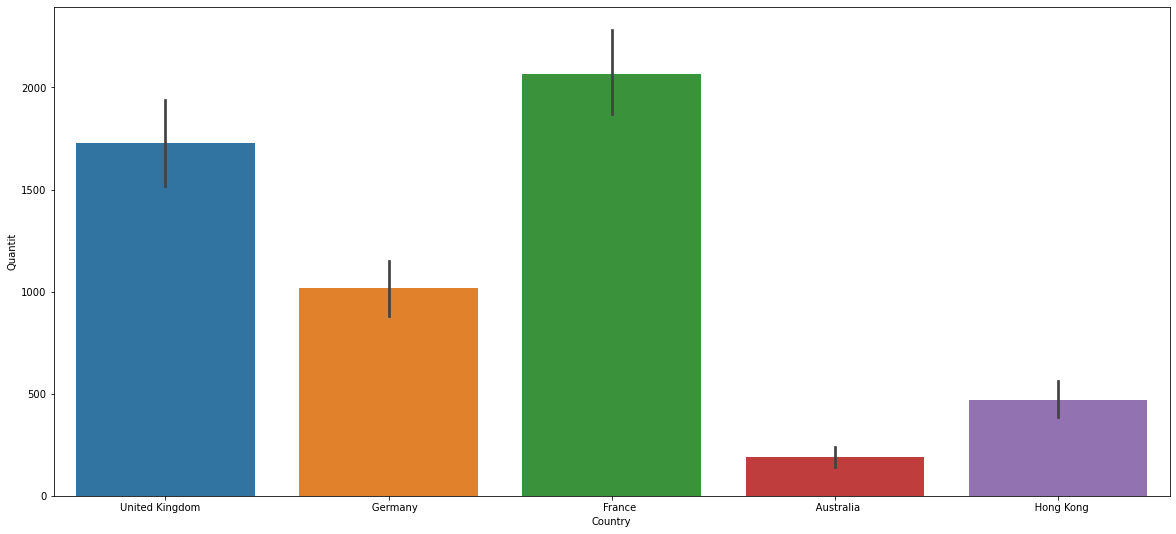

In [58]:
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(data = df_clean , x = 'Country', y = 'Quantit' ,estimator=np.sum)

In [59]:
fig = px.bar(data_frame= df_clean , x = 'Country' , y = 'Quantit')
fig.update_layout(title_text='The best Quantit in Country', title_x=0.5)
fig.show()

- the best Quantit in Country __France__

- __Q.11 What Hour recives high demand for Quantit?__

<AxesSubplot:xlabel='Hour', ylabel='Quantit'>

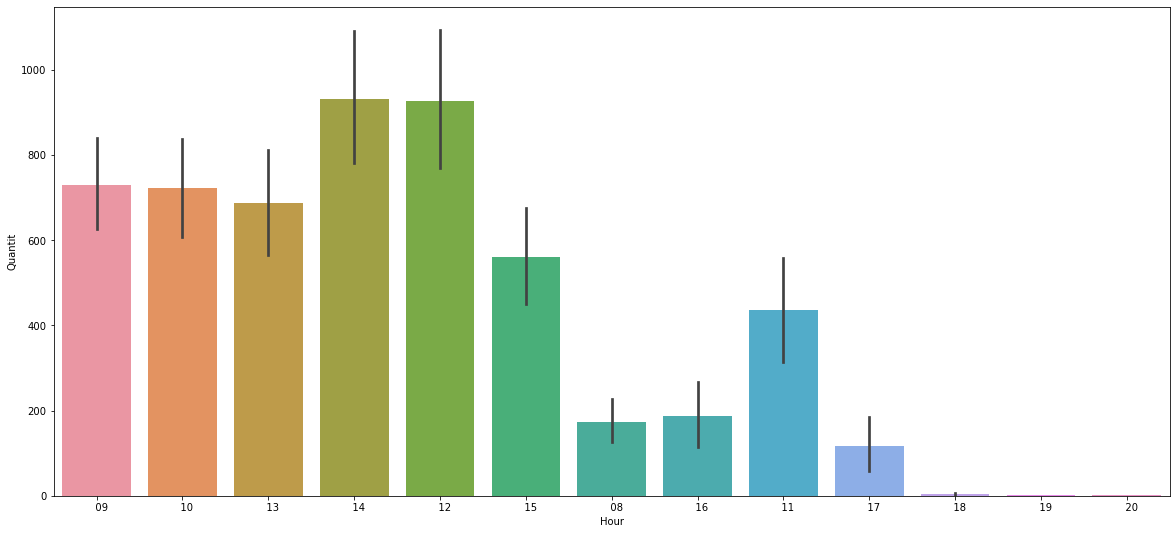

In [60]:
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(data= df_clean , x = 'Hour' , y = 'Quantit' , estimator = np.sum)

In [61]:
fig = px.bar(data_frame= df_clean , x = 'Hour' , y = 'Quantit')
fig.update_layout(title_text='Hour recives high demand for Quantit', title_x=0.2)
fig.show()

In [62]:
df_clean.groupby('Hour')['Quantit'].sum().reset_index()

,Hour,Quantit
0,08,172
1,09,730
2,10,722
3,11,435
4,12,926
5,13,686
6,14,930
7,15,560
8,16,187
9,17,116


- the best Quantit in Hour __14__

<a id=section18></a>

- __Q.12 What's the Time of the day that contributes to high Quantit?__

In [63]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'
df_clean.Hour = pd.to_numeric(df_clean.Hour, errors='coerce')
df_clean['OrderTimeOfDay']=df_clean['Hour'].apply(time_of_day)


<AxesSubplot:xlabel='OrderTimeOfDay', ylabel='Quantit'>

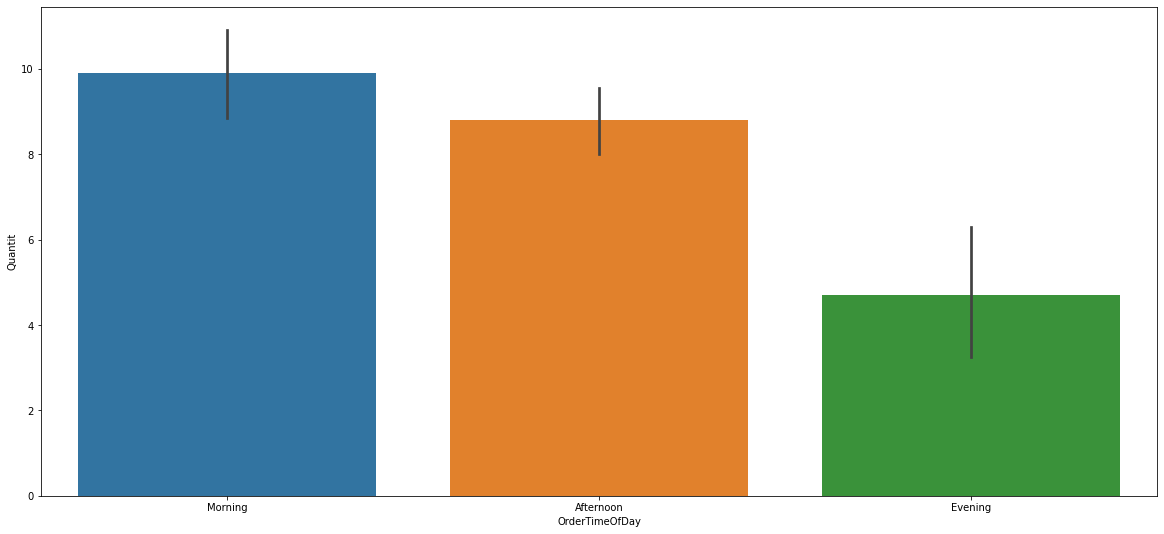

In [64]:
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(data= df_clean , x = 'OrderTimeOfDay' , y = 'Quantit')

In [65]:
fig = px.pie(data_frame=df_clean , names =df_clean.groupby('OrderTimeOfDay')['Quantit'].count().index
       , values = df_clean.groupby('OrderTimeOfDay')['Quantit'].count().values)
fig.update_layout(title_text='The Time of the day that contributes to high Quantit', title_x=0.2)
fig.show()

- the Time of the day that contributes to high Quantit is __Afternoon__

<a id=section19></a>

- __Q.13 How dataset features are correlated with each other?__

<AxesSubplot:>

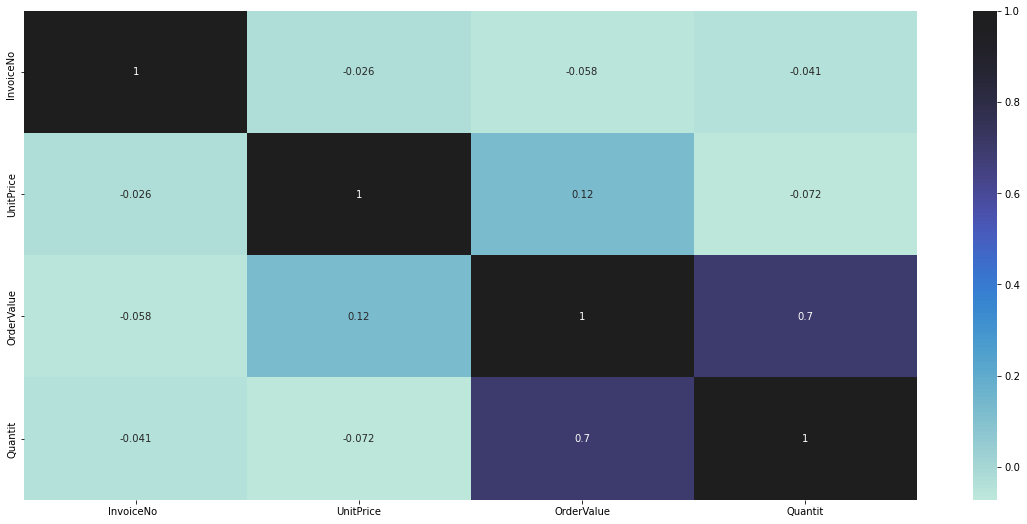

In [66]:
df_corelation = df.corr()
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df_corelation , center=1,annot=True)

<a id=section20></a>

##  Convert to csv file

In [67]:
df_clean.to_csv('Ecommerce_clean.csv', index = False)

<a id=section21></a>

##  Conclusions

- With the help of notebook I learnt how __EDA__ can be carried out using __Pandas and other plotting libraries__.
- Also I have seen making use of packages like __matplotlib,seaborn,Plotly__ to develop better insights about the data.<br/>
- I have also seen how __preproceesing__ helps in dealing with __missing values and irregualities__ present in the data.
- I have seen the impact of columns like __type, year/date__ on the __Average price increase/decrease rate__.


## Thanks for following 